## Unsupervised Learning
Hampir semua aplikasi dari pembelajran mesin saat ini menerapkan konsep supervised learning. Meskipun pada kenyataannya hampir semua data yang ada sebenarnya tidak memiliki label (*unlabeled*): kita tahu fitur input **$X$** tetapi kita tidak tahu label **$y$**.

Tonton video ini: https://www.youtube.com/watch?v=XGylvzr2yHE

Bayangkan kita ingin membangun suatu sistem yang akan mengambil gambar dari suatu benda hasil produksi parbik di *production line* lalu bisa langsung menentukan apakah benda tersebut memenuhi *quality control* atau tidak. Untuk melakukan hal ini, kita dapat melakukannya secara mudah dengan membuat sistem yang akan mengambil gambar secara otomatis, dan sistem ini akan menghasilkan ribuan gambar setiap hari. Dalam sekejap, kita akan memiliki banyak sekali gambar dalam waktu beberapa minggu. TETAPI, tidak ada label pada gambar tersebut! Jika kita ingin melatih sebuah *classifier* yang dapa memprediksi apakah suatu benda cacat atau tidak, kita perlu untuk memberikan label pada setiap gambar menjadi *defective* dan *normal*. Untuk melakukan ini kita membutuhkan pekerja dengan kemampuan bisa membedakan kedua kelas tadi lalu secara manual memberi label. Tentu ini merupakan tugas yang membosankan, berbiaya tinggi dan tidak efektif, jadi untuk mengatasi hal ini biasanya data yang diberikan label hanya untuk sejumlah kecil data saja. Tetapi akibat penggunaan data yang sedikit ini, model yang dibuat tidak memberikan hasil yang baik. Terlebih jika perusahaan tersebut melakukan perubahan seperti bentuk benda yang diproduksi sehingga model yang ada harus dibuat ulang kembali. 

Tentu akan sangat menarik jika ada sebuah algoritma yang dapat membedakan kelas dari suatu data tanpa memerlukan manusia untuk memberikan label secara manual.

Di materi pertemuan 7 sebenarnya kita sudah mempelajari salah satu algoritma *unsupervised learning* yaitu: reduksi dimensi. Di materi kali ini kita akan lebih berfokus pada *clustering*.

### Clustering

Sebagian besar dari kita pasti pernah berkunjung ke suatu taman bunga yang di dalamnya ada berbagai macam jenis bunga. Ketika kita melihat sekeliling, kita akan menemukan berbagai jenis tipe bunga. **Tunggu!** Bagaimana mungkin kita bisa tahu ada berbagai jenis tipe bunga padahal kita bukanlah seorang ahli tanaman? 

Proses pemisahan tipe bunga ini dapat kita lakukan secara spontan dengan melihat kumpulan bunga yang memiliki ciri-ciri yang sama, misalnya warna atau ukuran. Hal inilah yang disebut sebagai ***clustering***: kemampuan untuk mengidentifikasi kesamaan ciri-ciri pada suatu data dan mengkategorikan data tersebut ke dalam suatu klaster, grup yang memiliki banyak kesamaan.

Sama seperti **klasifikasi**, di mana setiap data diberikan label, tetapi tidak seperti pada proses klasifikasi, **clustering** merupakan sebuah pekerjaan yang bersifat **unsupervised**.

Perhatikan gambar dataset iris berikut!

In [43]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [44]:
from sklearn.datasets import load_iris

In [45]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Saving figure classification_vs_clustering_plot


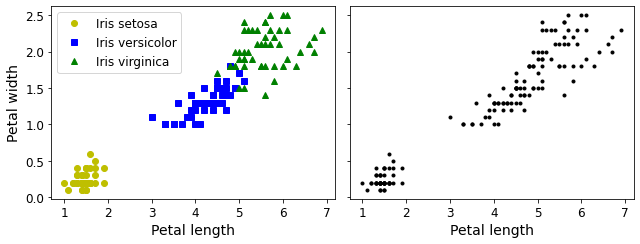

In [46]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

save_fig("classification_vs_clustering_plot")
plt.show()

Gambar kiri atas memperlihatkan hasil klasifikasi, sedangkan gambar kanan memperlihatkan hasil *clustering*.

**Clustering** memiliki banyak aplikasi, beberapa diantaranya:
- Segmentasi kustomer
- Analisa data
- Teknik reduksi dimensi
- Deteksi anomali
- **Semi-supervised** learning

### K-Means

Panggil dataset make_blobs dari library sklearn

In [47]:
from sklearn.datasets import make_blobs

Tentukan lokasi cluster (Ingat ini hanya untuk kebutuhan visualisas dan contoh, pada data aslinya nilai center seperti ini pasti tidak ada)

In [48]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

Generate data sebanyak 2000 untuk pusat lokasi cluster sesuai dengan yang sudah ditentukan

In [49]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [50]:
X

array([[-2.69823941,  1.3454702 ],
       [-2.87459835,  1.8097575 ],
       [ 0.96077126,  1.17046777],
       ...,
       [-2.80303543,  2.72948115],
       [ 0.24057359,  2.40103109],
       [-2.63807768,  1.95621065]])

Definisikan fungsi plot_clusters() untuk menampilkan scatter plot data make_blobs

In [51]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

Saving figure blobs_plot


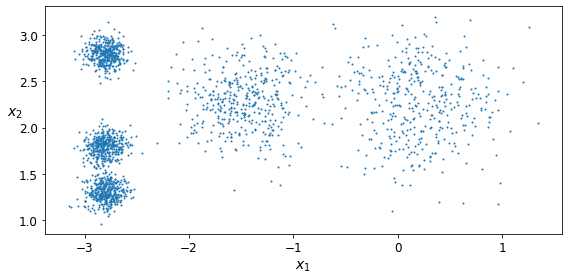

In [52]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

### Fit dan Prediksi

Sekarang kita akan melatih K-means dengan menggunakan data di atas. Langkah pertama dimulai dengan memanggil library KMeans

In [53]:
from sklearn.cluster import KMeans

Tentukan jumlah cluster yang akan dibentuk lalu lakukan proses pelatihan mencari cluster

In [54]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

Lihat hasil prediksi KMeans

In [55]:
y_pred

array([0, 4, 1, ..., 2, 1, 4])

Lihat lokasi pusat dari cluster algoritma KMeans

In [56]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

Buat data baru yang akan digunakan untuk menguji model KMeans yang sudah dibuat

In [57]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [60]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


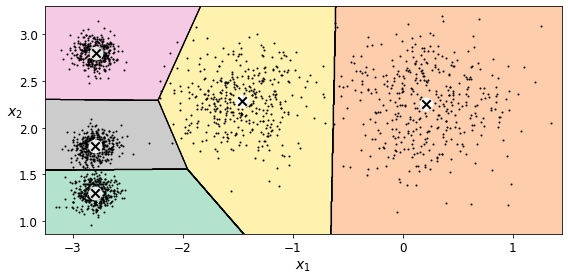

In [61]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

Untuk melihat ilustrasi bagaimana proses pencarian cluster di atas dapat kita lihat dari video berikut ini: https://www.youtube.com/watch?v=BVFG7fd1H30

### Algoritma K-Means

Algoritma K_Means merupakan salah satu algoritma clustering yang paling cepat, dan juga yang paling simpel. Berikut ini adalah cara kerja dari algoritmanya:
* Pertema tentukan jumlah klaster $K$ disertai dengan point dari data yang kita miliki $x_1,...,x_n$
* Lalu letakkan centroids $c_1,...,x_K$ di lokasi sembarang
* Lakukan prosedur di bawah ini sampai tidak ada lagi pergerakan dari centroids:
    * Untuk setiap point $x_i$:
        * Cari jarak centroid $c_j$ terdekat
        * Beri label klaster $j$ untuk point yang paling dekat dengan klaster tersebut
    * Untuk setiap klaster $j=1,..,K$:
        * Nilai centroid baru $c_j$ = rata-rata nilai dari posisi $x_i$ \begin{equation}
c_j(a)=\frac{1}{n_j}\sum_{x_i -> c_j}x_i(a)
\end{equation}

Dari penjelasan algoritma di atas, kita akan sama-sama belajar melihat bagaimana perubahan nilai centroid.

In [18]:
# Buat model KMeans dengan jumlah iterasi yang berbeda-beda
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

Saving figure kmeans_algorithm_plot


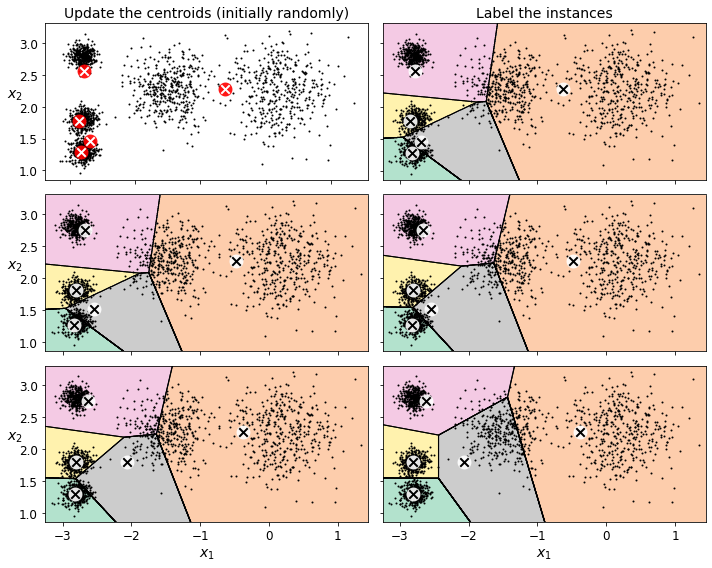

In [19]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

## Menentukan jumlah cluster
Sejauh ini kita berhasil menentukan jumlah klaster sebanyak 5 karena secara visual kita bisa menenentukannya. Tetapi, secara umum jika datanya lebih bersifat acak maka tidak akan mudah untuk menentukan jumlah klaster. Jumlah klaster yang tidak pas akan memberikan hasil yang kurang baik seperti ditunjukkan oleh gambar di bawah ini:

In [20]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

Saving figure bad_n_clusters_plot


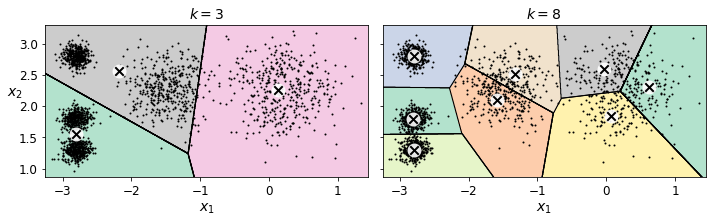

In [21]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
save_fig("bad_n_clusters_plot")
plt.show()

Parameter yang dapat digunakan untuk menentukan jumlah klaster ada 2, yaitu:
1. Intertia
    * *Mean squared distance* dari setiap *instance* dengan centroid yang paling dekat
2. Silhouette Score

### Inertia
Sekarang kita akan mencoba untuk menghitung intertia dari data yang sudah kita gunakan

In [22]:
kmeans_k3.inertia_

653.2223267580945

In [23]:
kmeans_k8.inertia_

118.44108623570087

Dari kedua nilai di atas kita masih belum bisa menentukan jumlah klaster $k$ yang dapat meminimalkan intertia. Tetapi satu hal yang kita tahu adalah semakin tinggi nilai $k$ maka nilai intertia semakin rendah. Oleh karena itu kita akan mencoba untuk membuat plot untuk mendapatkan intuisi secara lebih lagi.

In [24]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

Saving figure inertia_vs_k_plot


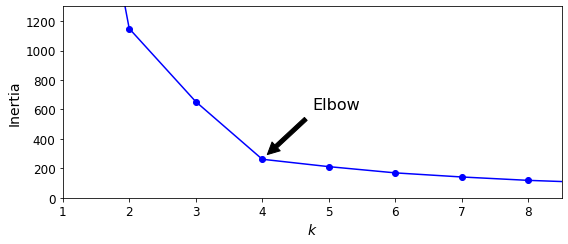

In [25]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot")
plt.show()

Dari gambar di atas kita bisa melihat kalau nilai inertia menurun secara drastis ketika kita meningkatkan nilai $k$ sampai menuju nilai 4, tetapi setelah itu penurunannya tidak sedrastis sebelumnya. Ini adalah cara pertama untuk menentukan jumlah klaster, tetapi cara ini memiliki kelemahan karena karena cara ini prinsipnya seperti menebak-nebak.

Tonton video penjelasan Silhouette Coefficient dari menit 02:50-selesai : https://www.youtube.com/watch?v=AtxQ0rvdQIA

Oleh karena itu kita akan menggunakan cara lain yang lebih saintifik dan tepat TETAPI lebih mahal secara komputasi, yaitu dengan menghitung Silhouette Coefficient. Cara menghitungnya: $(b-a)/max(a,b)$, di mana $a$ adalah rata-rata jarak dari dari setiap instances yang berada di dalam klaster yang sama dan $b$ adalah rata-rata jarak setiap instances dengan klaster terdekat. Nilai Silhouette Distance bervariasi dari -1 sampai 1. Jika nilainya mendekati 1 artinya setiap instance tersebut berada di dalam klaster yang tepat. Sebaliknya jika nilainya mendekati -1 artinya instance tersebut kemungkinan besar berada di klaster yang salah.

In [26]:
from sklearn.metrics import silhouette_score

In [27]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [28]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

Saving figure silhouette_score_vs_k_plot


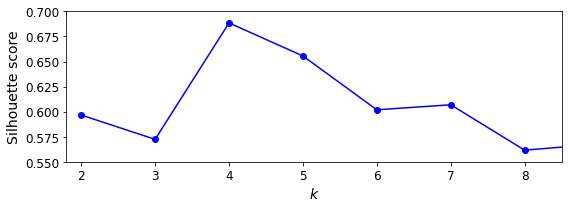

In [29]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

Dari gambar di atas kita bisa melihat kalau nilai Silhouette yang paling tinggi ada pada saat nilai $k$ = 4 atau $k$ = 5. Untuk mendapatkan gambaran yang lebih informatif bisa dengan melihat gambar di bawah ini:

Saving figure silhouette_analysis_plot


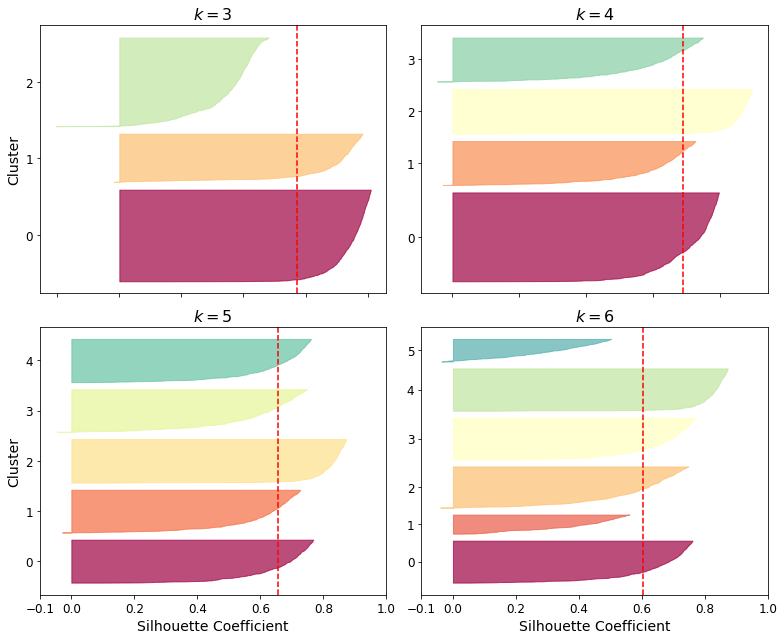

In [62]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

### DBSCAN
Density-based spatial clustering of application with noise (DBSCAN) adalah algoritma untuk melakukan *clustering* yang diciptakan pada tahun 1996 oleh Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996.Algoritma ini bejerha dengan alur kerja sebagai berikut: jika diketahui kumpulan titik di dalam suatu *space*, maka titik-titik yang berdekatan akan dianggap berasal dari satu kelas yang sama, sedangkan titik-titik lain akan dianggap sebagai pencilan. DBSCAN merupakan salah satu algoritma *clustering* yang paling banyak digunakan dan disitasi di dalam dunia akademik.

Pada tahun 2014, algoritma ini mendapat penghargaan dan perhatian baik dari dunia akademik maupun dunia praktisi.

Bagaimana cara algoritma ini bekerja?
Untuk ilustrasi awal, lihatlah video berikut ini:
https://www.youtube.com/watch?v=_A9Tq6mGtLI

### Algoritma DBSCAN

Berikut ini adalah cara kerja dari algoritmanya:
* Untuk setiap *instance* atau titik, tentukan diameter ${\epsilon}$ untuk setiap titik. Daerah yang dibentuk diberi nama *${\epsilon}$-neighborhood*
<img src="gambar1.png" width="250" />
* Hitung berapa banyak *instance* yang terdapat di dalam *${\epsilon}$-neighborhood* tersebut. Jika jumlah minimal sampel di dalam *${\epsilon}$-neighborhood* terpenuhi, maka *instance* tersebut akan diberi nama *core instance*. Dengan kata lain, *core instances* adalah titik yang berada di dalam daerah yang padat.
<img src="gambar2.png" width="250" />
* Jika ada *instances* yang tidak memenuhi jumlah minimal sampel tetapi masih berada di dalam *${\epsilon}$-neighborhood* dari suatu *core instance* maka dianggap berasal dari kelas yang sama. Sehingga untuk titik-titik yang saling berdekatan akan terbentuk suatu deret panjang yang berasal dari kelas yang sama.
<img src="gambar3.png" width="400" />
* Jika ada *instances* yang tidak memenuhi jumlah minimal sampel dan tidak berada di dalam *${\epsilon}$-neighborhood* dari suatu *core instance*, maka akan dianggap sebagai pencilan.
<img src="gambar4.png" width="600" />

## Latihan
<br>
Download data dari link berikut: https://drive.google.com/file/d/1JSSh0_PYFr-Za730LYWVAtH4clMNfLT3/view?usp=sharing 

Lalu tentukan berapa jumlah klaster yang terbentuk!
<img src="gambar5.png" width="600" />

### Code DBSCAN
Untuk mengimplementasikan DBSCAN, pertama-tama panggil data yang akan kita gunakan untuk melakukan proses klasifikasi. Pertama-tama kita perlu untuk menghasilkan dataset yang akan digunakan. Pada kesempatan kali ini dataset yang akan digunakan adalah dataset yang sama dengan algoritma K-Means di atas

In [31]:
from sklearn.datasets import make_blobs

Tentukan center dan standar deviasi dari dataset make_blobs

In [32]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

Dari kedua data di atas, generate dataset dengan menggunakan make_blobs lalu dapatkan nilai fitur X dan label y

In [33]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

Panggil library DBSCAN

In [34]:
from sklearn.cluster import DBSCAN

Latih dataset DBSCAN dengan menggunakan fitur X. Di dalam algoritma DBSCAN terdapat **dua hyperparameter** yang dapat dituning, yaitu: **eps** dan **min_samples**. Sekarang kita akan coba membandingkan dua buah DBSCAN dengan nilai **hyperparameter** yang berbeda.

In [35]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [36]:
dbscan2 = DBSCAN(eps=0.14, min_samples=5)
dbscan2.fit(X)

DBSCAN(eps=0.14)

In [37]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

Saving figure dbscan_plot


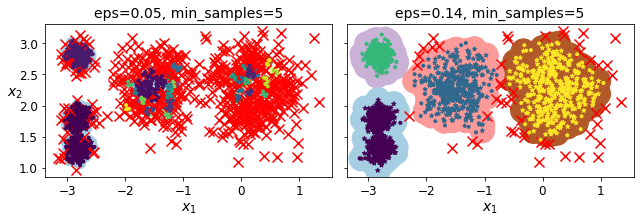

In [38]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()

Dari hasil di atas, kita bisa lihat perbedaan antara gambar di kiri dan kanan. Gambar di kiri menunjukkan banyaknya klaster dan pencilan yang terbentuk. Sedangkan pada gambar kanan jumlah klaster dan pencilan yang terbentuk lebih sedikit.

Untuk melihat jumlah kelas yang terbentuk dapat dilakukan dengan mencari nilai unik dari label yang terbentuk.

In [39]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

In [40]:
np.unique(dbscan2.labels_)

array([-1,  0,  1,  2,  3], dtype=int64)

### Pertanyaan untuk dianalisa
1. Mengapa klaster yang berada di pojok kiri bawah untuk nilai eps = 0.14 dan min_samples = 5 tidak dianggap sebagai dua klaster yang berbeda?
2. Menurut Anda, metode klaster mana yang lebih baik. Apakah K-Means atau DBSCAN?